<a href="https://colab.research.google.com/github/ZichenLiu123/DataScience_Learning/blob/main/Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


# Q1

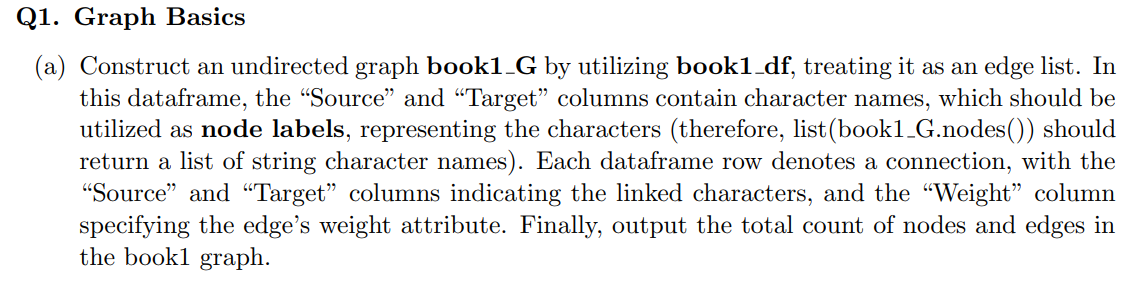

## (a)

In [ ]:
def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  ## YOUR CODE STARTS HERE
  G_book = nx.Graph()

  for (index, Source, Target, Type, weight, book) in book_df.itertuples():
    G_book.add_edge(Source, Target, weight = weight)
  return G_book

book1_G = make_graph(book1_df)
book1_G = book1_G.to_undirected()

## Print number of nodes and egdes
## YOUR CODE STARTS HERE
print("# nodes:", len(book1_G.nodes()))
print("# edges:", len(book1_G.edges()))

# nodes: 187
# edges: 684


## (b)

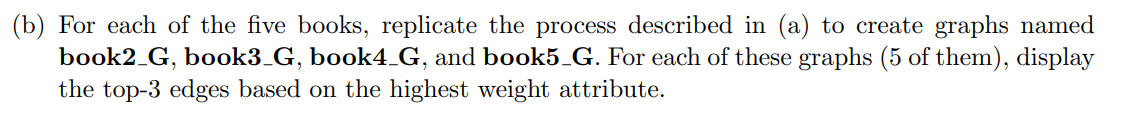

In [ ]:
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)

## YOUR CODE STARTS HERE
print(sorted(book1_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:3])
print(sorted(book2_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:3])
print(sorted(book3_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:3])
print(sorted(book4_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:3])
print(sorted(book5_G.edges(data=True),key= lambda x: x[2]['weight'],reverse=True)[:3])

[('Eddard-Stark', 'Robert-Baratheon', {'weight': 291}), ('Bran-Stark', 'Robb-Stark', {'weight': 112}), ('Arya-Stark', 'Sansa-Stark', {'weight': 104})]
[('Tyrion-Lannister', 'Joffrey-Baratheon', {'weight': 92}), ('Tyrion-Lannister', 'Cersei-Lannister', {'weight': 87}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 76})]
[('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 95}), ('Jaime-Lannister', 'Brienne-of-Tarth', {'weight': 87}), ('Jon-Snow', 'Mance-Rayder', {'weight': 83})]
[('Cersei-Lannister', 'Tommen-Baratheon', {'weight': 80}), ('Cersei-Lannister', 'Margaery-Tyrell', {'weight': 67}), ('Cersei-Lannister', 'Jaime-Lannister', {'weight': 49})]
[('Daenerys-Targaryen', 'Hizdahr-zo-Loraq', {'weight': 96}), ('Theon-Greyjoy', 'Ramsay-Snow', {'weight': 87}), ('Daenerys-Targaryen', 'Barristan-Selmy', {'weight': 75})]


## (c)

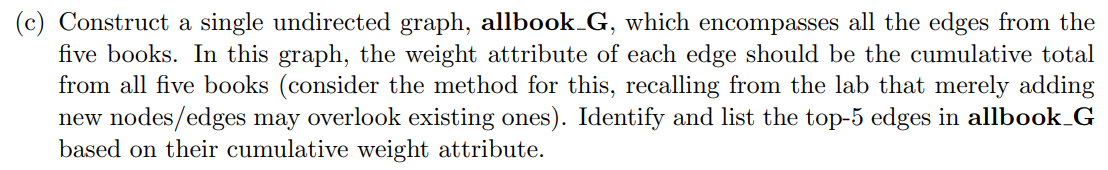

In [ ]:
allbook_G = nx.Graph()

allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

## YOUR CODE STARTS HERE
cumulative_weights_df = allbook_df.groupby(['Source', 'Target']).sum().reset_index()

for index, row in cumulative_weights_df.iterrows():
    allbook_G.add_edge(row['Source'], row['Target'], Weight=row['weight'])

top_5_edges = sorted(allbook_G.edges(data=True), key=lambda x: x[2]['Weight'], reverse=True)[:5]

for edge in top_5_edges:
    print(edge)

## Hint, df.groupby().sum().reset_index()
## Note that the dataframes are pre-sorted, thus there's no duplicate pairs of ( Source=A,Target=B ) and ( Source=B,Target=A )


<ipython-input-6-5554317e64dc>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cumulative_weights_df = allbook_df.groupby(['Source', 'Target']).sum().reset_index()


('Eddard-Stark', 'Robert-Baratheon', {'Weight': 334})
('Jon-Snow', 'Samwell-Tarly', {'Weight': 228})
('Joffrey-Baratheon', 'Sansa-Stark', {'Weight': 222})
('Joffrey-Baratheon', 'Tyrion-Lannister', {'Weight': 219})
('Cersei-Lannister', 'Tyrion-Lannister', {'Weight': 209})


# Q2

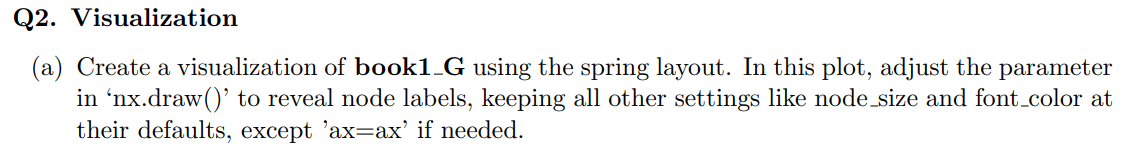

## (a)

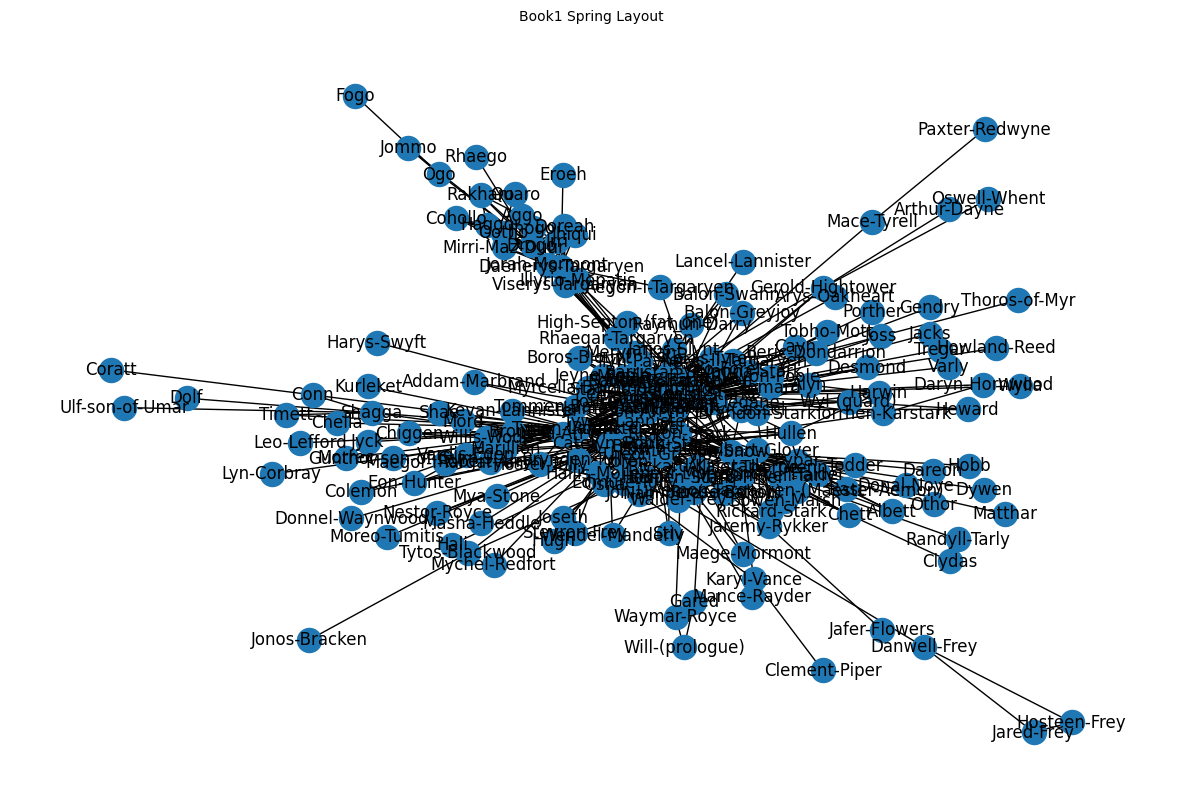

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)

## YOUR CODE STARTS HERE
pos_spring = nx.spring_layout(book1_G)
nx.draw(book1_G, pos_spring, with_labels=True, ax=ax)
plt.show()

## (b)

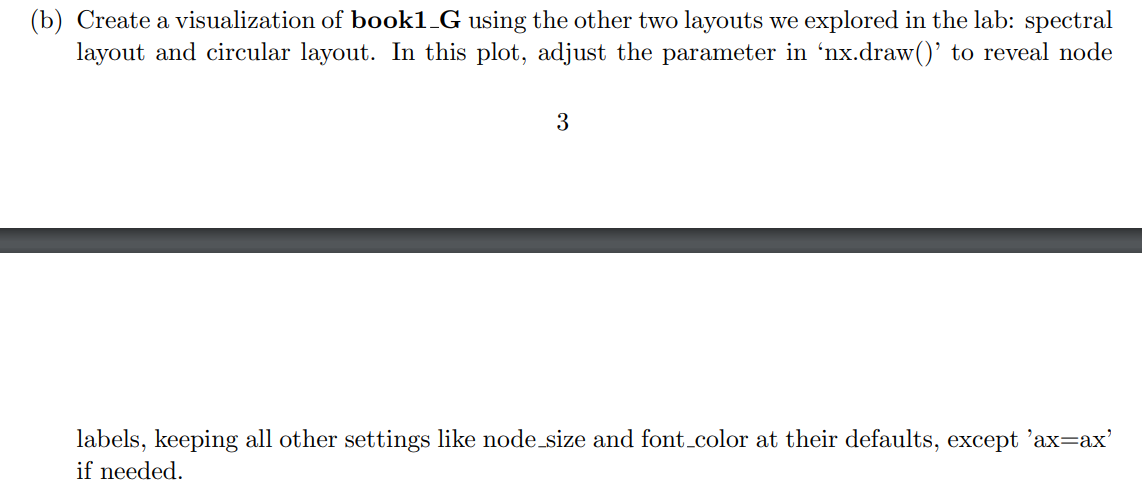

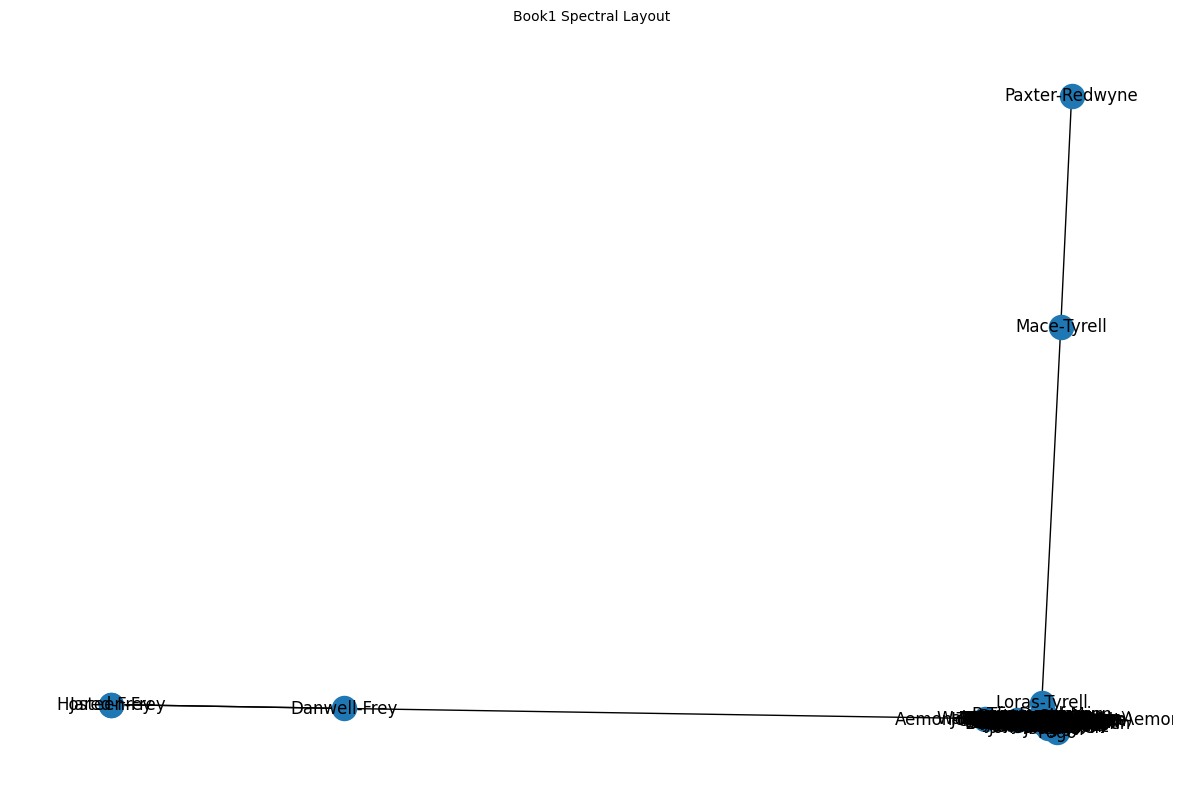

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)
## YOUR CODE STARTS HERE
pos_spectral = nx.spectral_layout(book1_G)
nx.draw(book1_G, pos_spectral, with_labels=True, ax=ax)
plt.show()

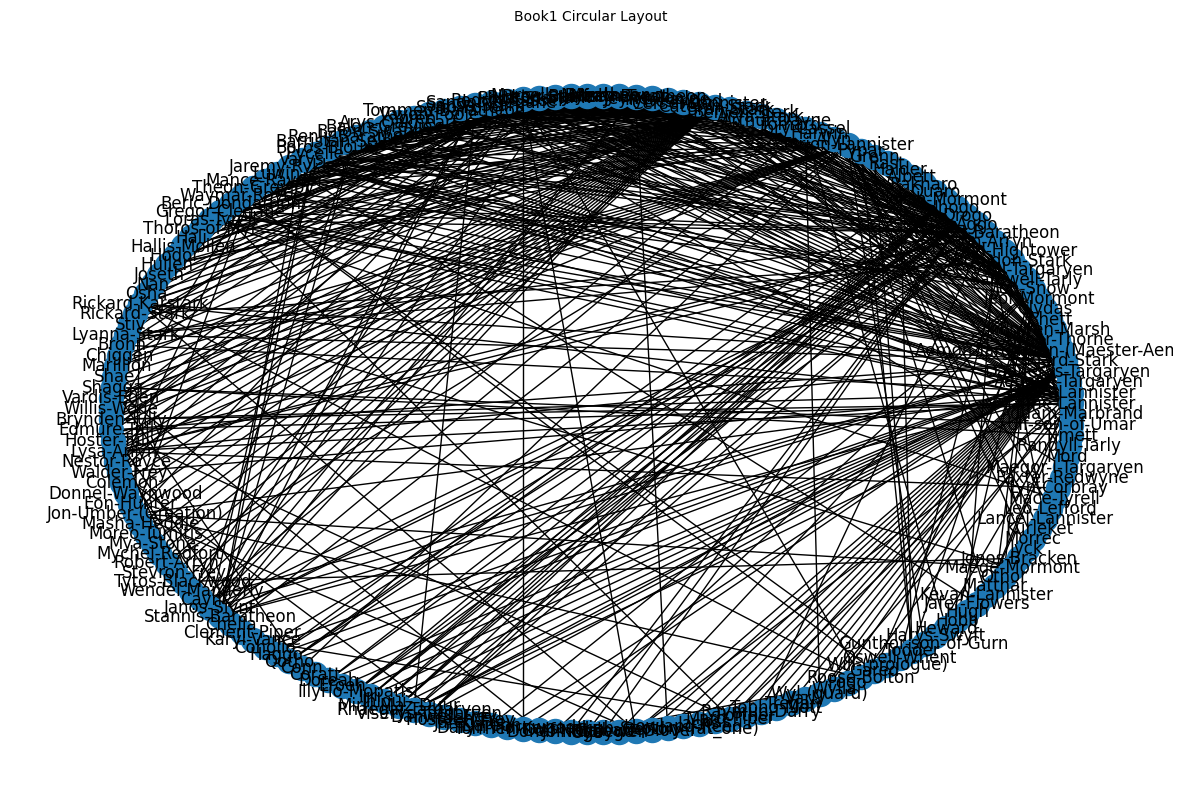

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)
## YOUR CODE STARTS HERE
pos_circular = nx.circular_layout(book1_G)
nx.draw(book1_G, pos_circular, with_labels=True, ax=ax)
plt.show()

# Q3

## (a)

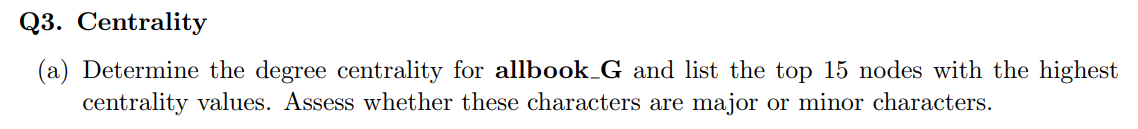

In [ ]:
## YOUR CODE STARTS HERE
deg_centrality = nx.degree_centrality(allbook_G)
deg_char = sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]
deg_char

[('Tyrion-Lannister', 0.15345911949685534),
 ('Jon-Snow', 0.14339622641509434),
 ('Jaime-Lannister', 0.1270440251572327),
 ('Cersei-Lannister', 0.1220125786163522),
 ('Stannis-Baratheon', 0.11194968553459118),
 ('Arya-Stark', 0.10566037735849056),
 ('Catelyn-Stark', 0.09433962264150943),
 ('Sansa-Stark', 0.09433962264150943),
 ('Robb-Stark', 0.0930817610062893),
 ('Eddard-Stark', 0.0930817610062893),
 ('Daenerys-Targaryen', 0.09182389937106918),
 ('Joffrey-Baratheon', 0.08679245283018867),
 ('Theon-Greyjoy', 0.0830188679245283),
 ('Robert-Baratheon', 0.08176100628930817),
 ('Bran-Stark', 0.06792452830188679)]

**Enter answer here:** All the characters listed, especially those at the very top like Tyrion Lannister and Jon Snow, with centrality values of around 0.15 and 0.14, are major characters in the narrative. These values indicate a significant level of interaction with other characters, suggesting they are central to the plot and have numerous connections within the story.



## (b)

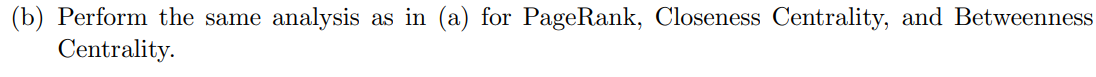

In [ ]:
# PageRank
## YOUR CODE STARTS HERE
pr_centrality = nx.pagerank(allbook_G)
sorted(pr_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]

[('Jon-Snow', 0.018999569248566855),
 ('Tyrion-Lannister', 0.018341232619311046),
 ('Jaime-Lannister', 0.015437447356269757),
 ('Stannis-Baratheon', 0.013648810781186758),
 ('Arya-Stark', 0.013432050115231258),
 ('Cersei-Lannister', 0.013334880500361593),
 ('Daenerys-Targaryen', 0.01306103925081491),
 ('Theon-Greyjoy', 0.01205961678384477),
 ('Eddard-Stark', 0.011476379237586546),
 ('Catelyn-Stark', 0.011173248389900782),
 ('Robb-Stark', 0.011070712956413459),
 ('Sansa-Stark', 0.010167104437094572),
 ('Joffrey-Baratheon', 0.008849271476022649),
 ('Robert-Baratheon', 0.00877328013349021),
 ('Bran-Stark', 0.008370521867185938)]

In [ ]:
# Closeness Centrality,
## YOUR CODE STARTS HERE
cl_centrality = nx.closeness_centrality(allbook_G)
sorted(cl_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]

[('Tyrion-Lannister', 0.4763331336129419),
 ('Robert-Baratheon', 0.4592720970537262),
 ('Eddard-Stark', 0.455848623853211),
 ('Cersei-Lannister', 0.45454545454545453),
 ('Jaime-Lannister', 0.4519613416714042),
 ('Jon-Snow', 0.44537815126050423),
 ('Stannis-Baratheon', 0.4446308724832215),
 ('Robb-Stark', 0.4441340782122905),
 ('Joffrey-Baratheon', 0.4339519650655022),
 ('Catelyn-Stark', 0.4334787350054526),
 ('Sansa-Stark', 0.43300653594771243),
 ('Arya-Stark', 0.43136190992946283),
 ('Theon-Greyjoy', 0.4233226837060703),
 ('Bran-Stark', 0.41886195995785036),
 ('Tywin-Lannister', 0.4112778065183652)]

In [ ]:
# Betweenness Centrality
## YOUR CODE STARTS HERE
betw_centrality = nx.betweenness_centrality(allbook_G)
sorted(betw_centrality.items(), key=lambda x:x[1], reverse=True)[0:15]

[('Jon-Snow', 0.1921196196835449),
 ('Tyrion-Lannister', 0.1621910961115984),
 ('Daenerys-Targaryen', 0.11841801916269204),
 ('Theon-Greyjoy', 0.11128331813470228),
 ('Stannis-Baratheon', 0.11013955266679566),
 ('Jaime-Lannister', 0.10083800602581632),
 ('Cersei-Lannister', 0.08870426655860289),
 ('Arya-Stark', 0.08724236063571153),
 ('Eddard-Stark', 0.07873239257251873),
 ('Robert-Baratheon', 0.07822769060383258),
 ('Robb-Stark', 0.06646842683586629),
 ('Catelyn-Stark', 0.054973667953404186),
 ('Sansa-Stark', 0.04869098175180615),
 ('Barristan-Selmy', 0.045549578315223826),
 ('Bran-Stark', 0.04491117872765179)]

## (c)

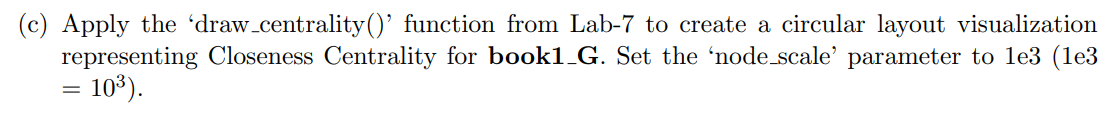

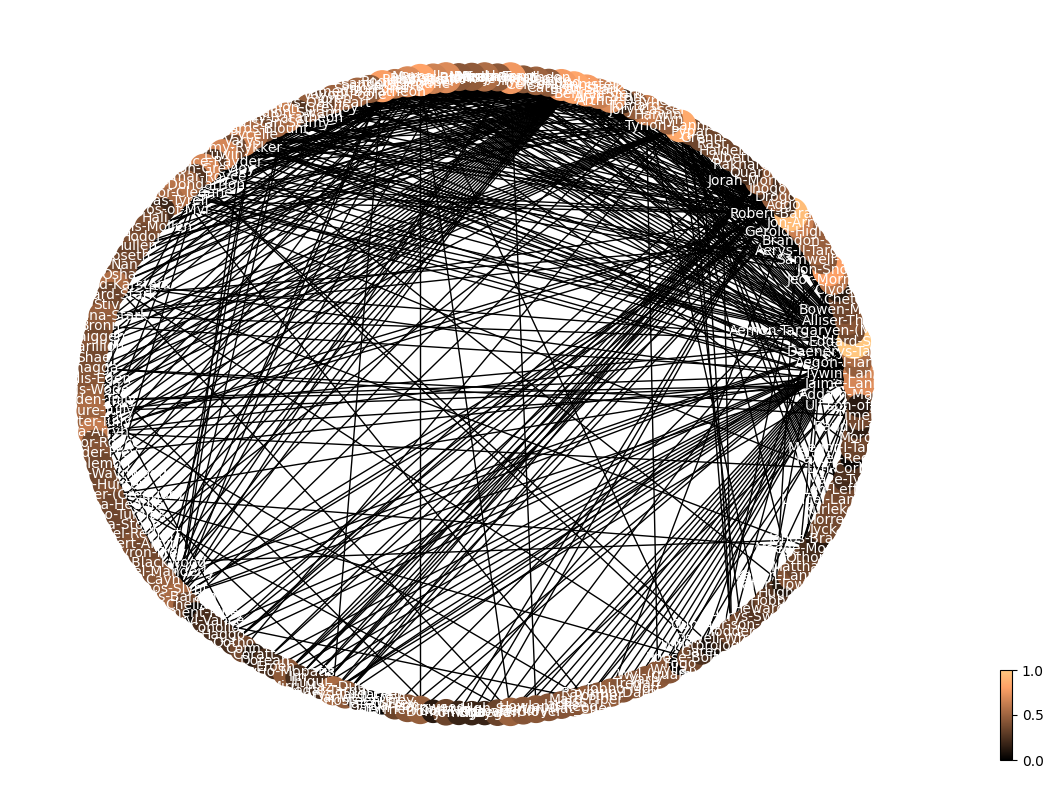

In [ ]:
## YOUR CODE STARTS HERE
# Helper function to draw a graph that node size and color are proportional to the centrality_measure
closeness_centrality = nx.closeness_centrality(book1_G)

def draw_centrality(G: nx.Graph, centrality_measure: dict, node_scale: float):
    fig, ax = plt.subplots(figsize=(12, 10))

    # Convert centrality values to a numpy array of floats
    centrality = np.fromiter(centrality_measure.values(), float)

    # Use a circular layout
    pos = nx.circular_layout(G)

    # Draw the graph with scaled node sizes
    nx.draw(G, pos, ax=ax, node_color=centrality, node_size=centrality * node_scale, cmap=plt.cm.copper)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color="white")

    # Place a colorbar
    sub_ax = fig.add_axes([0.95, 0.13, 0.01, 0.09])
    plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.copper), cax=sub_ax)

    plt.show()


draw_centrality(book1_G, closeness_centrality, node_scale=1e3)



# Q4

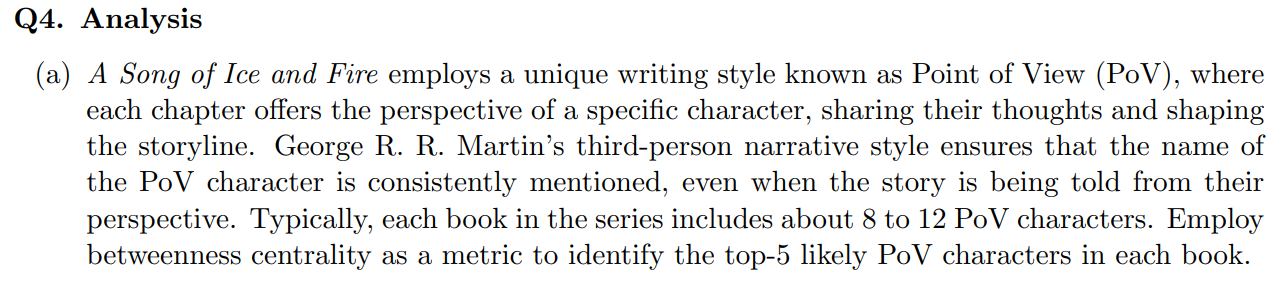

## (a)

In [ ]:
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    print(f"Book{book_num+1}")

    betweenness_centrality = nx.betweenness_centrality(book_G)
    top_5_pov_characters = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

    for character, centrality in top_5_pov_characters:
        print(f"{character}: {centrality}")
    print()


Book1
Eddard-Stark: 0.2696038913836117
Robert-Baratheon: 0.21403028397371787
Tyrion-Lannister: 0.1902124972697492
Jon-Snow: 0.17158135899829566
Catelyn-Stark: 0.1513952715347627

Book2
Arya-Stark: 0.1881116846731781
Jon-Snow: 0.17443976935054054
Robb-Stark: 0.1649406213117506
Tyrion-Lannister: 0.15532375650368552
Robert-Baratheon: 0.15374366220396257

Book3
Jon-Snow: 0.2238286056882584
Robert-Baratheon: 0.1664354010358413
Robb-Stark: 0.16232085177685468
Tyrion-Lannister: 0.15409096601718392
Joffrey-Baratheon: 0.14189087122742164

Book4
Stannis-Baratheon: 0.2763060074924735
Cersei-Lannister: 0.2754801247893542
Jaime-Lannister: 0.24281879137413512
Balon-Greyjoy: 0.19059739280327515
Sansa-Stark: 0.1527539849794001

Book5
Stannis-Baratheon: 0.45283060689247934
Daenerys-Targaryen: 0.2959459062106149
Jon-Snow: 0.24484873673158666
Tyrion-Lannister: 0.20961613179551256
Robert-Baratheon: 0.17716906651536968



## (b)

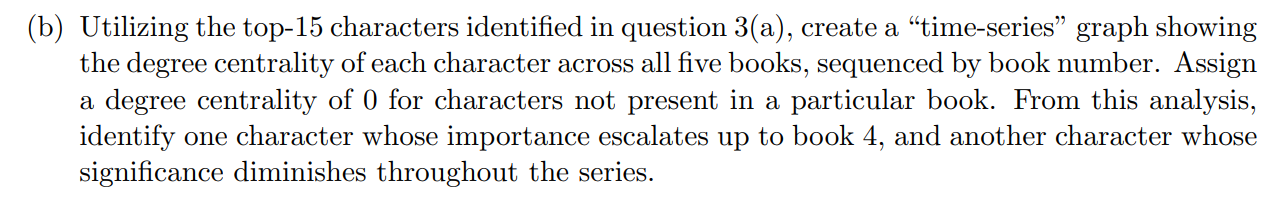

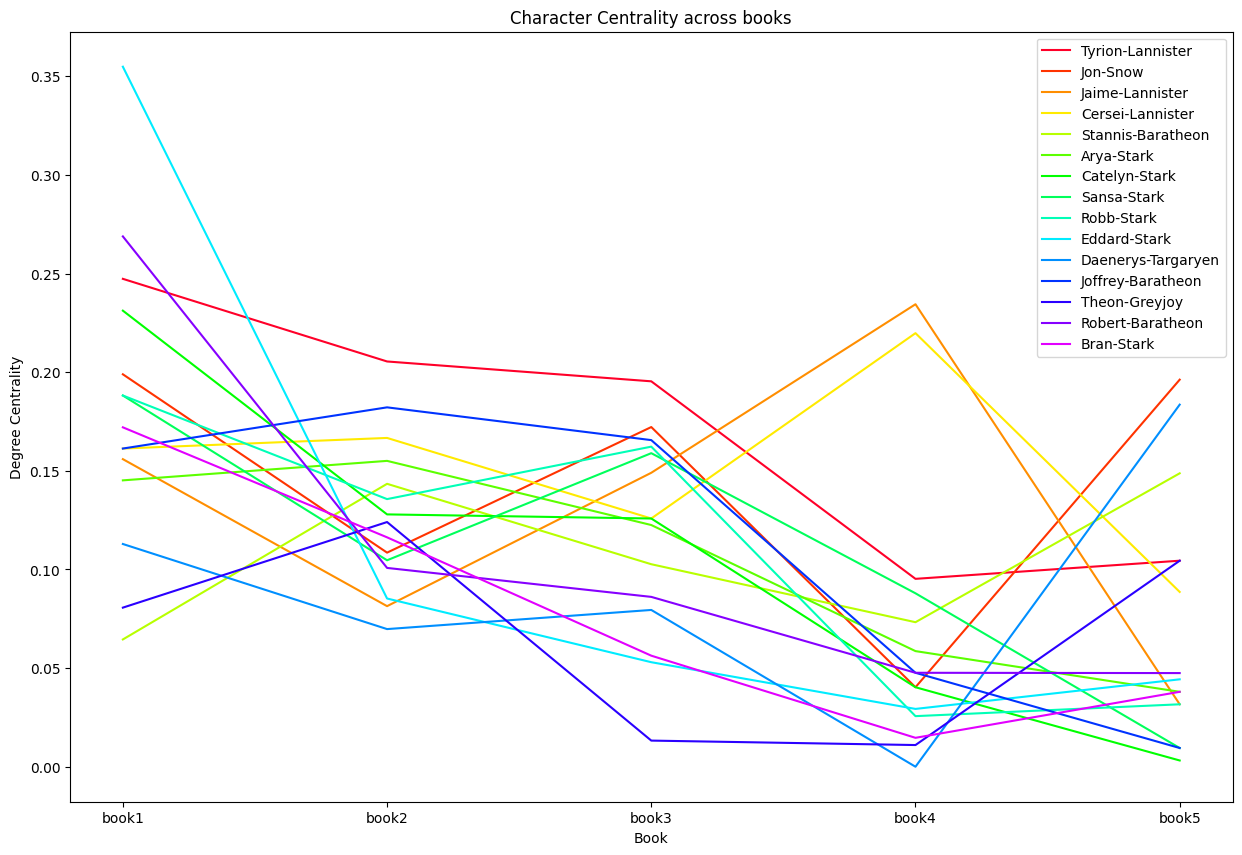

In [ ]:
## YOUR CODE STARTS HERE
candidates = [character[0] for character in deg_char]

## YOU MAY USE THIS PART or IMPLEMENT YOUR OWN
deg_centrality_books = np.zeros((15,5))
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    deg_centrality = nx.degree_centrality(book_G)
    for i,candidate in enumerate(candidates):
      if candidate in deg_centrality:
        deg_centrality_books[i][book_num]= deg_centrality.get(candidate)
      else:
        deg_centrality_books[i][book_num]= 0


fig, ax = plt.subplots(figsize=(15, 10))
books_axis = [f'book{i+1}' for i in range(5)]

# If use default cm the colors start to rotate after 8 categories
NUM_COLORS = 15
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i,candidate in enumerate(candidates):
    plt.plot(books_axis, deg_centrality_books[i], label=candidate)

plt.xlabel("Book")
plt.ylabel("Degree Centrality")
plt.legend()
plt.title('Character Centrality across books')
plt.show()


**Enter answer here:** Jaime-Lannister's importance escalates up to book 4 and Sansa-Stark's importance diminishes throughout the series.

